In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# <b> Project I: </b>Lyft Bikes (BayWheels) Promotion Recommendations

## <b>Introduction</b>

Founded in August 29, 2013, Lyft's Bay Wheels (formerly Ford GoBike) entered the Bay Area bike share market to compete directly with Uber's JUMP bike share service (founded roughly three years prior in 2010). As a direct competitor to the incumbent, Uber's JUMP, Lyft's own <i>Bay Wheels</i> has a strong incentive to increase ridership and to grow their market share in the bike share service marketplace. To achieve this goals, I conducted an analysis on prior Lyft Bike data (from BayWheel's founding on August 29, 2013 through August 31, 2016, to get a better understanding of the ridership and identify areas of opportunity for growth. 

For this analysis we want to address 2 main questions:

<b>1. What are the 5 most popular trips that we would call "commuter trips"? </b> 

<b>2. What recommendations should Lyft Bikes take to increase their ridership? </b>

## <b> Summary </b>
### Top 5 Most Popular "Commuter" Trips

Answering the first of the 2 main questions is imperative to understanding Lyft's Bike ridership. According to the [US Census Bureau report](https://www.census.gov/newsroom/press-releases/2014/cb14-86.html) published on May 08, 2014, there has been a 60% increase in biking to work over the last decade. By understanding the most popular "commuter" trips, I can understand Lyft's current state better.

I defined a commuter trip as a trip satisfying all of the following requirements:  

1. a trip between the hours of 7 AM - 9 AM and 4PM - 6PM during the weekdays (Monday - Friday).  
    - This was determined according to a [trip advisor forum post](https://www.tripadvisor.com/ShowTopic-g60713-i30-k2240412-Rush_hour_in_SF-San_Francisco_California.html#:~:text=Typical%20rush%20hour%20times%20are,SFO%20on%20a%20Saturday%2C%20though.) denoting such times as rush hour in the Bay Area  

2. a trip not lasting a minimum of 2 minutes and not in excess of 60 minutes
    - This was determined according to a post by [mobilitylab.org](https://mobilitylab.org/2017/02/27/how-far-bike-work/) that stated a bike commute to work should be not in excess of 10 miles, roughly a 60 minute bike commute.  

3. Having a differing start and end bike station, assuming commuters are traveling in one direction as versus a round trip 


<b>The Top 5 Most Popular "Commuter" Trips are the trips in the below table:</b>

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as commuter_trips FROM `bike_trip_data.trips_full_commute_pst` WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec < 3600 AND duration_sec > 120 AND Commute = "Yes" GROUP BY start_station_name, end_station_name ORDER BY commuter_trips DESC LIMIT 5' > top_5_commuter_trips.csv

Waiting on bqjob_r14c56935183b8318_00000175833ebba2_1 ... (1s) Current status: DONE   


In [3]:
top_5 = pd.read_csv('top_5_commuter_trips.csv')
top_5

,start_station_name,end_station_name,commuter_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5336
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5290
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5180
3,Embarcadero at Sansome,Steuart at Market,5065
4,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),4840


## <b>Final Recommendation</b>

#### Upon conclusion of my analysis, I recommend Lyft offer the following promotion cycle:

#### <b>Lyft Bikes should increase and add promotions to offer monthly subscriptions to current customers who take Lyft bikes on the weekends. Additionally, Lyft should advertise the top 5 most popular non-commuter rides that subscribers have taken from the customer's geographic landmark. </b> 
- New bike trip recommendations would provides 5 new bike trips that they can try, allowing individuals who enjoyed their Lyft Bike experience to feel more compelled to purchase a subscription and complete these suggested trips.

## Data Analysis


To justify the recommendations above, I began by taking a looking at the current distribution of riders in the dataset. I wanted to see when Lyft Bikes were the most busy and where Lyft Bikes were the least busy to understand where there is the most opportunity for growth and if there are any constraints that may prevent certain promotions from being effective. 

<i>I defined the event of being busy as the event that at any given status check there is a low availability of bikes, where less that 25% of bikes are available for rental at any given station.</i>

### <b> Plotting Busy Lyft Bikes' Days</b>

### Overall Business (Subscribers and Customers)

In [4]:
! bq query --use_legacy_sql=False --format=csv 'SELECT status_check_day_of_week AS day_of_week, COUNT(status_check_date) AS no_of_low_availability FROM `bike_trip_data.status_w_availability` WHERE bike_availability = "low" GROUP BY status_check_day_of_week ORDER BY no_of_low_availability' > ride_freq_dow.csv

Waiting on bqjob_r358518cc437647d2_00000175833ecce7_1 ... (4s) Current status: DONE   


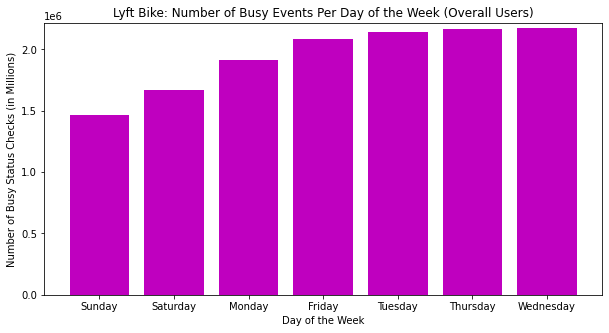

In [5]:
availability_dow = pd.read_csv('ride_freq_dow.csv')
plt.figure(figsize = (10,5))
plt.bar(availability_dow.day_of_week, availability_dow.no_of_low_availability, color = 'm')
plt.ylim(0,np.max(availability_dow.no_of_low_availability)+40000)
plt.yticks(np.arange(0, np.max(availability_dow.no_of_low_availability)+40000, 500000))
plt.ylabel('Number of Busy Status Checks (in Millions)')
plt.xlabel('Day of the Week')
plt.title('Lyft Bike: Number of Busy Events Per Day of the Week (Overall Users)')
plt.show()

<b> Analysis: </b> While this is really helpful, we need to dig even deeper to understand when customers are taking bike rides to understand when it is most effective to target them for promotions and advertising. I decided to look at Customer Bike Ride Frequencies next in order to see when there were the most customers riding bikes.

### <b> Customer Bike Ride Frequency </b>

In [6]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_day_of_week, COUNT(distinct pst_trip_id) AS number_of_trips FROM `bike_trip_data.trips_full_commute_pst`  WHERE subscriber_type = "Customer" GROUP BY start_day_of_week ORDER BY number_of_trips DESC' > sub_trips.csv

Waiting on bqjob_r168b8fed25a4c954_00000175833eea98_1 ... (1s) Current status: DONE   


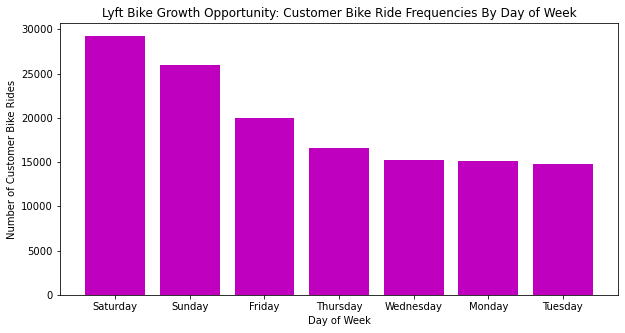

In [7]:
sub_trips = pd.read_csv('sub_trips.csv')
plt.figure(figsize=(10,5))
plt.bar(sub_trips.start_day_of_week, sub_trips.number_of_trips, color = 'm')
plt.ylabel('Number of Customer Bike Rides')
plt.xlabel('Day of Week')
plt.title('Lyft Bike Growth Opportunity: Customer Bike Ride Frequencies By Day of Week')
plt.show()

As you can see from the graph, there are significantly less status checks with less than 25% of bikes available to ride on the weekend (Saturday & Sunday). There were also a  relatively high frequency of status checks that had low bike availability during the weekdays. Therefore I don't see having promotions catered towards customers during the weekday as an effective promotion campaign because the weekdays have more low availability events which means that there would be less opportunity for subscribers to get a bike rental during the week than during the weekend. <b>Therefore, I recommend having promotional campaigns for users to sign up for a monthly subscription of Lyft Bikes during the weekend.</b> Having a promotion during the weekend allows for:
- a higher likelihood that new subscribers will have a positive experience with Lyft Bikes because of increased bike availability and therefore, increased bike selection options
- Greater opportunity to grow ridership because of more bike trips by Customers during the weekend
    - <u><i>Figure 2</i></u> shows the highest volume of Customer Bike Rides on the weekends. Promotions targeting Customers will be most effective here as Customers are the most active renting Lyft Bikes during the weekend.

## Trip Recommendations to Incentivize Potential Subscribers

<b>By providing 5 new trip ideas that a potential subscriber may be interested in based on their geographic location, Lyft can customize their user's experience and incentivize additional trips through a subscription.</b> To provide the most accurate recommendation of the next 5 potential trips, I subset the data to only include subscribers that took trips on the weekends in the landmark areas near the customer's end station. This filters out commuter trips that maybe irrelevant to the potential subscriber and trips that would require additional travel farther from a customer's current location. This would subset the trip routes to only those that are more likely to be nearby leisure trips than work commutes; increasing the likelihood that a trip will be enjoyable for the weekend customer.

Each of theses trips are between 15 - 30 minutes one way, allowing customers to feel incentivized to purchase a monthly subscription because of the short trip duration and the popularity of these short getaways with Lyft Bike subscribers. This may incentivize some to purchase monthly subscriptions as a way to "get in on the fun" that Lyft Bike subscribers have.

## Top 5 Trips in:

### Redwood City

In [8]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) AS subscriber_trips FROM `bike_trip_data.end_trip_landmarks`  WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec <= 1800 AND duration_sec >= 900 AND landmark = "Redwood City" GROUP BY start_station_name, end_station_name ORDER BY subscriber_trips DESC LIMIT 5' > redwood_city_top_5.csv
rwc = pd.read_csv('redwood_city_top_5.csv')
rwc.columns = ['Start Station', 'End Station', 'Number of Subscribers Trip']
rwc

Waiting on bqjob_r43b35ec8adc1aad1_00000175833efb9d_1 ... (0s) Current status: DONE   


,Start Station,End Station,Number of Subscribers Trip
0,Stanford in Redwood City,Redwood City Caltrain Station,152
1,Redwood City Caltrain Station,Stanford in Redwood City,100
2,Palo Alto Caltrain Station,Stanford in Redwood City,63
3,San Mateo County Center,Redwood City Caltrain Station,16
4,Stanford in Redwood City,Redwood City Public Library,11


### San Jose

In [9]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) AS subscriber_trips FROM `bike_trip_data.end_trip_landmarks`  WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec <= 1800 AND duration_sec >= 900 AND landmark = "San Jose" GROUP BY start_station_name, end_station_name ORDER BY subscriber_trips DESC LIMIT 5' > san_jose_top_5.csv
sj = pd.read_csv('san_jose_top_5.csv')
sj.columns = ['Start Station', 'End Station', 'Number of Subscribers Trip']
sj

Waiting on bqjob_r79a64ecdbadae1b9_00000175833f07da_1 ... (0s) Current status: DONE   


,Start Station,End Station,Number of Subscribers Trip
0,Japantown,San Jose Diridon Caltrain Station,212
1,San Jose Diridon Caltrain Station,Japantown,180
2,San Jose Diridon Caltrain Station,San Jose City Hall,125
3,San Jose Diridon Caltrain Station,SJSU - San Salvador at 9th,96
4,SJSU - San Salvador at 9th,San Jose Diridon Caltrain Station,87


### San Francisco

In [10]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) AS subscriber_trips FROM `bike_trip_data.end_trip_landmarks`  WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec <= 1800 AND duration_sec >= 900 AND landmark = "San Francisco" GROUP BY start_station_name, end_station_name ORDER BY subscriber_trips DESC LIMIT 5' > san_francisco_top_5.csv
sf = pd.read_csv('san_francisco_top_5.csv')
sf.columns = ['Start Station', 'End Station', 'Number of Subscribers Trip']
sf

Waiting on bqjob_r159d7034c7730c58_00000175833f13db_1 ... (0s) Current status: DONE   


,Start Station,End Station,Number of Subscribers Trip
0,Embarcadero at Sansome,San Francisco Caltrain (Townsend at 4th),1537
1,San Francisco Caltrain (Townsend at 4th),Embarcadero at Sansome,1468
2,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,1423
3,Clay at Battery,San Francisco Caltrain (Townsend at 4th),1310
4,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),1192


### Palo Alto

In [11]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) AS subscriber_trips FROM `bike_trip_data.end_trip_landmarks`  WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec <= 1800 AND duration_sec >= 900 AND landmark = "Palo Alto" GROUP BY start_station_name, end_station_name ORDER BY subscriber_trips DESC LIMIT 5' > palo_alto_top_5.csv
pa = pd.read_csv('palo_alto_top_5.csv')
pa.columns = ['Start Station', 'End Station', 'Number of Subscribers Trip']
pa

Waiting on bqjob_r10d2f8035122e63b_00000175833f1fed_1 ... (0s) Current status: DONE   


,Start Station,End Station,Number of Subscribers Trip
0,Park at Olive,Palo Alto Caltrain Station,223
1,California Ave Caltrain Station,University and Emerson,168
2,Cowper at University,California Ave Caltrain Station,120
3,California Ave Caltrain Station,Cowper at University,114
4,Park at Olive,University and Emerson,113


### Mountain View

In [12]:
! bq query --use_legacy_sql=False --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) AS subscriber_trips FROM `bike_trip_data.end_trip_landmarks`  WHERE start_date_pst = end_date_pst AND start_station_name <> end_station_name AND duration_sec <= 1800 AND duration_sec >= 900 AND landmark = "Mountain View" GROUP BY start_station_name, end_station_name ORDER BY subscriber_trips DESC LIMIT 5' > mountain_view_top_5.csv
mv = pd.read_csv('mountain_view_top_5.csv')
mv.columns = ['Start Station', 'End Station', 'Number of Subscribers Trip']
mv

Waiting on bqjob_r56f0bec6cd3f6ea2_00000175833f2b8c_1 ... (0s) Current status: DONE   


,Start Station,End Station,Number of Subscribers Trip
0,Mountain View Caltrain Station,San Antonio Shopping Center,138
1,Mountain View Caltrain Station,San Antonio Caltrain Station,95
2,Charleston Park/ North Bayshore Area,Mountain View Caltrain Station,93
3,San Antonio Shopping Center,Mountain View Caltrain Station,85
4,Mountain View Caltrain Station,Charleston Park/ North Bayshore Area,83


# <b>Appendix</b>

### SQL Subquery Views Used in Google BigQuery in Project 1:

1. `bike_trip_data.trips_full_commute_pst`

``` sql
SELECT
  trip_id AS pst_trip_id,
  DATE(start_date) AS start_date_pst,
  TIME(start_date) AS start_time_pst,
  CASE
    WHEN EXTRACT(HOUR FROM TIME(start_date)) >= 4 AND EXTRACT(HOUR FROM TIME(start_date)) < 12 THEN 'Morning'
    WHEN EXTRACT(HOUR FROM TIME(start_date)) >= 12 AND EXTRACT(HOUR FROM TIME(start_date)) < 18 THEN 'Afternoon'
    WHEN EXTRACT(HOUR FROM TIME(start_date)) >= 18 AND EXTRACT(HOUR FROM TIME(start_date)) < 24 THEN 'Evening'
    ELSE 'Midnight'
    END AS start_time_of_day,
  CASE EXTRACT (DAYOFWEEK FROM DATE(start_date))
    WHEN 1 THEN 'Sunday'
    WHEN 2 THEN 'Monday'
    WHEN 3 THEN 'Tuesday'
    WHEN 4 THEN 'Wednesday'
    WHEN 5 THEN 'Thursday'
    WHEN 6 THEN 'Friday'
    WHEN 7 THEN 'Saturday'
    END AS start_day_of_week,
  CASE
    WHEN EXTRACT(DAYOFWEEK FROM DATE(start_date)) NOT IN (1, 7) THEN 'Weekday'
    ELSE 'Weekend'
    END AS start_weekday,
  DATE(end_date) AS end_date_pst,
  TIME(end_date) AS end_time_pst,
  CASE
    WHEN EXTRACT(HOUR FROM TIME(end_date)) >= 4 AND EXTRACT(HOUR FROM TIME(end_date)) < 12 THEN 'Morning'
    WHEN EXTRACT(HOUR FROM TIME(end_date)) >= 12 AND EXTRACT(HOUR FROM TIME(end_date)) < 18 THEN 'Afternoon'
    WHEN EXTRACT(HOUR FROM TIME(end_date)) >= 18 AND EXTRACT(HOUR FROM TIME(end_date)) < 24 THEN 'Evening'
    ELSE 'Midnight'
    END AS end_time_of_day,
  CASE EXTRACT (DAYOFWEEK FROM DATE(end_date))
    WHEN 1 THEN 'Sunday'
    WHEN 2 THEN 'Monday'
    WHEN 3 THEN 'Tuesday'
    WHEN 4 THEN 'Wednesday'
    WHEN 5 THEN 'Thursday'
    WHEN 6 THEN 'Friday'
    WHEN 7 THEN 'Saturday'
    END AS end_day_of_week,
  CASE
    WHEN EXTRACT(DAYOFWEEK FROM DATE(end_date)) NOT IN (1, 7) THEN 'Weekday'
    ELSE 'Weekend'
    END AS end_weekday,
  CASE
    WHEN EXTRACT (HOUR FROM TIME(start_date)) IN (7, 8, 9) THEN 'AM'
    WHEN EXTRACT (HOUR FROM TIME(start_date)) IN (16, 17, 18) THEN 'PM'
    ELSE 'Not Commute'
    END AS ampm_commute,
  CASE
    WHEN EXTRACT (HOUR FROM TIME(start_date)) IN (7, 8, 9) THEN 'Yes'
    WHEN EXTRACT (HOUR FROM TIME(start_date)) IN (16, 17, 18) THEN 'Yes'
    ELSE 'No'
    END AS commute,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  zip_code,
  duration_sec,
  subscriber_type,
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`;
```

2. `bike_trip_data.status_w_availability`

```sql
SELECT station_id, 
       DATE(time) AS status_check_date,
       TIME(time) AS status_check_time,
       CASE EXTRACT (DAYOFWEEK FROM DATE(time))
           WHEN 1 THEN 'Sunday'
           WHEN 2 THEN 'Monday'
           WHEN 3 THEN 'Tuesday'
           WHEN 4 THEN 'Wednesday'
           WHEN 5 THEN 'Thursday'
           WHEN 6 THEN 'Friday'
           WHEN 7 THEN 'Saturday'
           END AS status_check_day_of_week,
       docks_available, bikes_available,
       (docks_available + bikes_available) AS total_bikes,
       CASE
           WHEN bikes_available = 0 AND docks_available = 0 THEN 'NA'
           WHEN bikes_available / (docks_available + bikes_available) < 0.25 THEN 'low'
           ELSE 'high'
           END AS bike_availability,
FROM `bigquery-public-data.san_francisco.bikeshare_status`
```

3. `bike_trip_data.end_trip_landmarks`

```sql
SELECT *
FROM `bike_trip_data.trips_full_commute_pst` AS trips
INNER JOIN (SELECT station_id, landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations`) AS stations
ON trips.end_station_id = stations.station_id
```

4. `bike_trip_data.trips_seasons_year`

```sql
SELECT pst_trip_id, start_date_pst, start_time_pst, end_date_pst, end_time_pst, subscriber_type,
  EXTRACT(YEAR FROM start_date_pst) AS year,
  CASE
    WHEN EXTRACT(MONTH FROM start_date_pst) IN (12, 1, 2) THEN 'Winter'
    WHEN EXTRACT(MONTH FROM start_date_pst) IN (3, 4, 5) THEN 'Spring'
    WHEN EXTRACT(MONTH FROM start_date_pst) IN (6, 7, 8) THEN 'Summer'
    WHEN EXTRACT(MONTH FROM start_date_pst) IN (9, 10, 11) THEN 'Fall'
    ELSE 'NA'
    END AS start_date_month,
FROM `bike_trip_data.trips_full_commute_pst`;
```